### Exploratory Data Analysis of Boston Crime Dataset

### Data Preparation

In [ ]:
# Load EDA Pkgs
import pandas as pd 
import numpy as np 

In [ ]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load Dataset
df = pd.read_csv("data/crime.csv",encoding='iso-8859-1')

In [ ]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
# Shape of Data
df.shape

(319073, 17)

In [ ]:
# Descriptive Stats
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


#### Task 1
+ Implement the following behavior in the supplied app.py file:
    1. Give the option to choose an hour and then plot on a map all the locations where crimes were committed in the city:

#### Task 2
+ Give the option to choose from the top 10 offenses (The offenses that happen most often, each row counts as one offense) and then count the number of times this offense happened per day of the week.


#### Solution
+ Find names of all offenses
+ Find the value count of each offense
+ Find top 10 offenses via nlargest
+ Find the number of times per day using groupby

In [ ]:
# Named of Columns
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [ ]:
# List all offenses in our dataset
df['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

In [ ]:
# Number of unique offenses
len(df['OFFENSE_CODE_GROUP'].unique())

67

In [ ]:
# Get Top 10 Offenses
df['OFFENSE_CODE_GROUP'].value_counts().nlargest(10)

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

In [ ]:
# Day of week
df['DAY_OF_WEEK']

0           Sunday
1          Tuesday
2           Monday
3           Monday
4           Monday
            ...   
319068      Sunday
319069    Thursday
319070    Thursday
319071     Tuesday
319072      Monday
Name: DAY_OF_WEEK, Length: 319073, dtype: object

In [ ]:
# Convert DAY_OF_WEEK to an ordered category
df['DAY_OF_WEEK'] = pd.Categorical(df.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)


In [ ]:
df['DAY_OF_WEEK']

0           Sunday
1          Tuesday
2           Monday
3           Monday
4           Monday
            ...   
319068      Sunday
319069    Thursday
319070    Thursday
319071     Tuesday
319072      Monday
Name: DAY_OF_WEEK, Length: 319073, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [ ]:
# Total Number of Offenses Per Day of the week for Vandalism
df[df['OFFENSE_CODE_GROUP'] == 'Vandalism']['DAY_OF_WEEK'].value_counts()

Saturday     2437
Sunday       2420
Friday       2228
Monday       2132
Wednesday    2101
Tuesday      2071
Thursday     2026
Name: DAY_OF_WEEK, dtype: int64

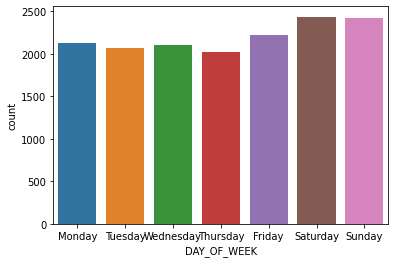

In [ ]:
# Plot For Vandalism Per Day of the week
sns.countplot(df[df['OFFENSE_CODE_GROUP'] == 'Vandalism']['DAY_OF_WEEK'])

In [ ]:
df[df['OFFENSE_CODE_GROUP'] == 'Vandalism']['DAY_OF_WEEK']

1          Tuesday
43        Saturday
47          Monday
57          Friday
104         Monday
            ...   
318682      Monday
318695      Monday
318699      Monday
318824    Thursday
318826    Thursday
Name: DAY_OF_WEEK, Length: 15415, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [ ]:
df.columns


Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [ ]:
df_count_per_week = df[['OFFENSE_CODE_GROUP','DAY_OF_WEEK']]

In [ ]:
df_count_per_week.to_csv("count_per_week_crime_data.csv")

In [ ]:
# Function to Find Top Offense Per Day of Week
def get_count_of_offense_per_day_of_week(offense):
    # Plot For Vandalism Per Day of the week
    plt.title("Count of Offense for {}".format(offense))
    sns.countplot(df[df['OFFENSE_CODE_GROUP'] == offense]['DAY_OF_WEEK'])
    plt.show()

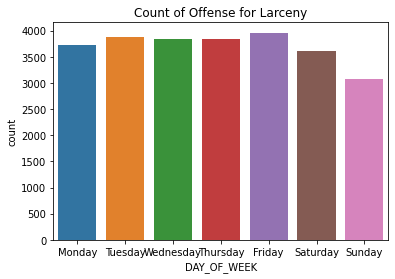

In [ ]:
get_count_of_offense_per_day_of_week("Larceny")

#### Task 3
+     3. Give the option to choose one of the possible districts in the dataset and then plot 2 bar plots (one for 2016 and one for 2017) of the average amount of serious crime in each month in that district.
        a. Serious crimes are [Larceny, Robbery, Drug Violation, Auto Theft]
        b. Example: If in a district in January you had 10 Larceny incidents, 15 robberies, 20 drug violation and 3 auto theft, then your average serious crime rate is 12.
        
#### Solution
+ Find rows with serious crime only
+ Group by districts and year
+ Find the count of each crime
+ Find average count

In [ ]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [ ]:
# List of Districts
df['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

In [ ]:
# Find All District C11 and Year 2016
df[(df['DISTRICT'] == 'C11') & (df['YEAR'] == 2016)]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1813,I182068927,1107,Fraud,FRAUD - IMPERSONATION,C11,384,NaN,2016-01-10 00:00:00,2016,1,Sunday,0,Part Two,HILL TOP ST,42.280498,-71.048885,"(42.28049764, -71.04888519)"
18989,I182050387,3201,Property Lost,PROPERTY - LOST,C11,249,NaN,2016-09-06 00:00:00,2016,9,Tuesday,0,Part Three,SYDNEY ST,42.313279,-71.052921,"(42.31327922, -71.05292093)"
21441,I182047771,2647,Other,THREATS TO DO BODILY HARM,C11,356,NaN,2016-01-01 12:00:00,2016,1,Friday,12,Part Two,CHARLES ST,42.299909,-71.064248,"(42.29990887, -71.06424768)"
21663,I182047517,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,C11,356,NaN,2016-12-13 00:00:00,2016,12,Tuesday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
25888,I182043088,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,C11,817,NaN,2016-06-30 00:00:00,2016,6,Thursday,0,Part Two,ARGYLE TER,42.288702,-71.065307,"(42.28870235, -71.06530713)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318997,I130126035-00,3130,Search Warrants,SEARCH WARRANT,C11,252,NaN,2016-02-09 13:55:00,2016,2,Tuesday,13,Part Three,SAVIN HILL AV,NaN,NaN,"(0.00000000, 0.00000000)"
318998,I130126035-00,338,Robbery,ROBBERY - UNARMED - RESIDENCE,C11,252,NaN,2016-02-09 13:55:00,2016,2,Tuesday,13,Part One,SAVIN HILL AV,NaN,NaN,"(0.00000000, 0.00000000)"
318999,I130126035-00,617,Larceny,LARCENY IN A BUILDING $200 & OVER,C11,252,NaN,2016-02-09 13:55:00,2016,2,Tuesday,13,Part One,SAVIN HILL AV,NaN,NaN,"(0.00000000, 0.00000000)"
319059,I090321958-00,3125,Warrant Arrests,WARRANT ARREST,C11,355,NaN,2016-02-01 01:43:00,2016,2,Monday,1,Part Three,GENEVA AVE,NaN,NaN,"(0.00000000, 0.00000000)"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text major ticklabel objects>)

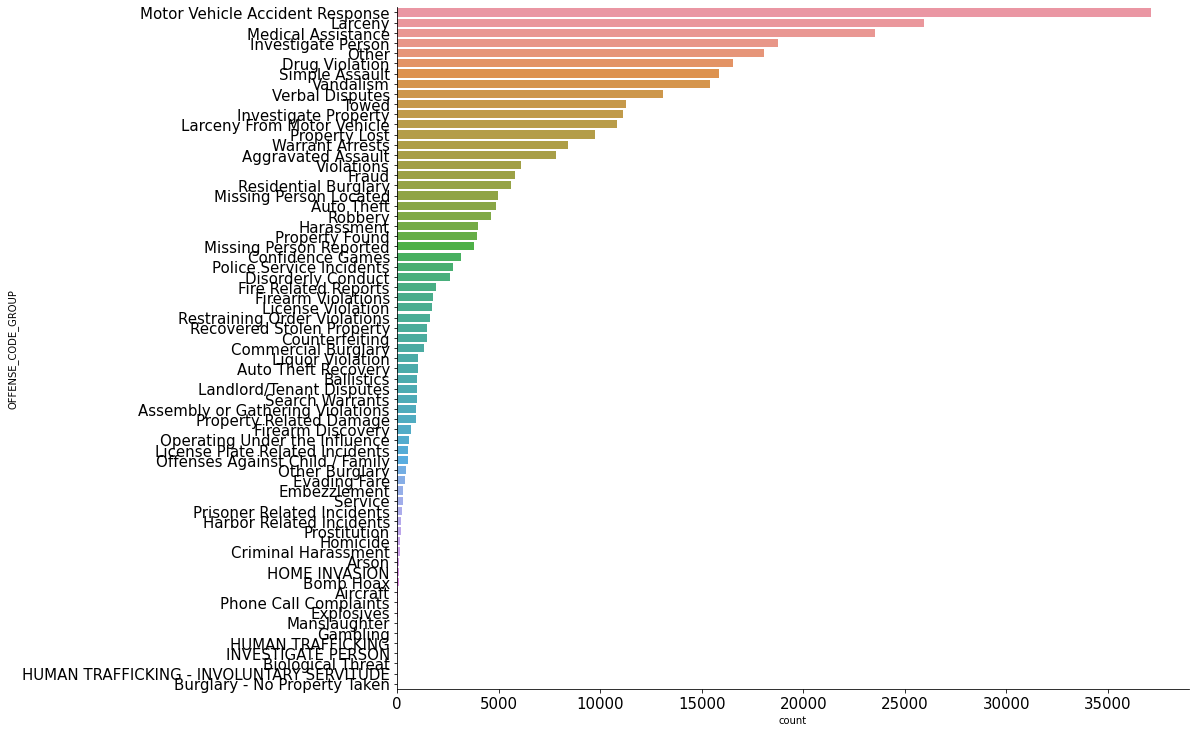

In [ ]:
sns.catplot(y='OFFENSE_CODE_GROUP', kind='count', height=10, aspect=1.5, order=df['OFFENSE_CODE_GROUP'].value_counts().index,  data=df)
plt.xticks(size=15)
plt.yticks(size=15)

In [ ]:
# Check if those serious crimes are in the top values
df[(df['DISTRICT'] == 'C11') & (df['YEAR'] == 2016)]['OFFENSE_CODE_GROUP'].value_counts().nlargest(10)

Motor Vehicle Accident Response    1706
Medical Assistance                  984
Investigate Person                  882
Verbal Disputes                     834
Vandalism                           813
Other                               790
Drug Violation                      784
Larceny                             670
Simple Assault                      649
Warrant Arrests                     445
Name: OFFENSE_CODE_GROUP, dtype: int64

In [ ]:
# Grouped Data For District C11
dist_c11 = df[(df['DISTRICT'] == 'C11') & (df['YEAR'] == 2016)]

In [ ]:
# Size of Crimes Per Month
dist_c11.groupby('MONTH')['OFFENSE_CODE_GROUP'].size()

MONTH
1     1132
2      999
3     1187
4     1156
5     1206
6     1127
7     1172
8     1188
9     1131
10    1103
11    1115
12    1087
Name: OFFENSE_CODE_GROUP, dtype: int64

In [ ]:
# Size of Crimes Per Month
dist_c11.groupby('MONTH')['OFFENSE_CODE_GROUP'].value_counts()

MONTH  OFFENSE_CODE_GROUP             
1      Motor Vehicle Accident Response    138
       Vandalism                           92
       Medical Assistance                  81
       Other                               74
       Investigate Person                  71
                                         ... 
12     Evading Fare                         1
       Homicide                             1
       Offenses Against Child / Family      1
       Operating Under the Influence        1
       Prisoner Related Incidents           1
Name: OFFENSE_CODE_GROUP, Length: 581, dtype: int64

Text(-8.825000000000003, 0.5, 'Count')

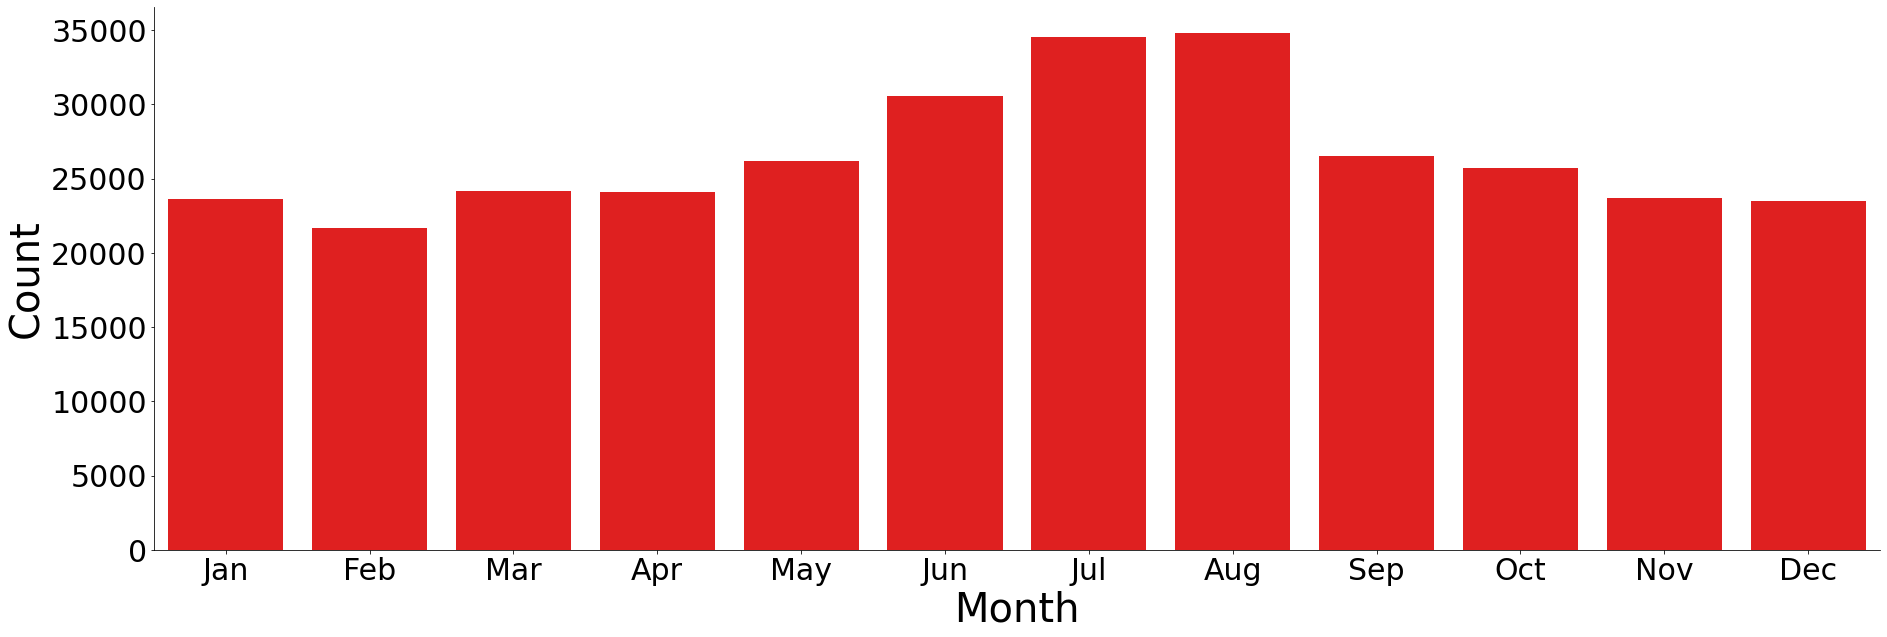

In [ ]:
# Plot of all crime per month
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.catplot(x='MONTH',
           kind='count',
            height=8.27, 
            aspect=3,
            color='red',
           data=df)
plt.xticks(np.arange(12), Months, size=30)

# plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Month', fontsize=40)
plt.ylabel('Count', fontsize=40)

Text(-2.575000000000003, 0.5, 'Count')

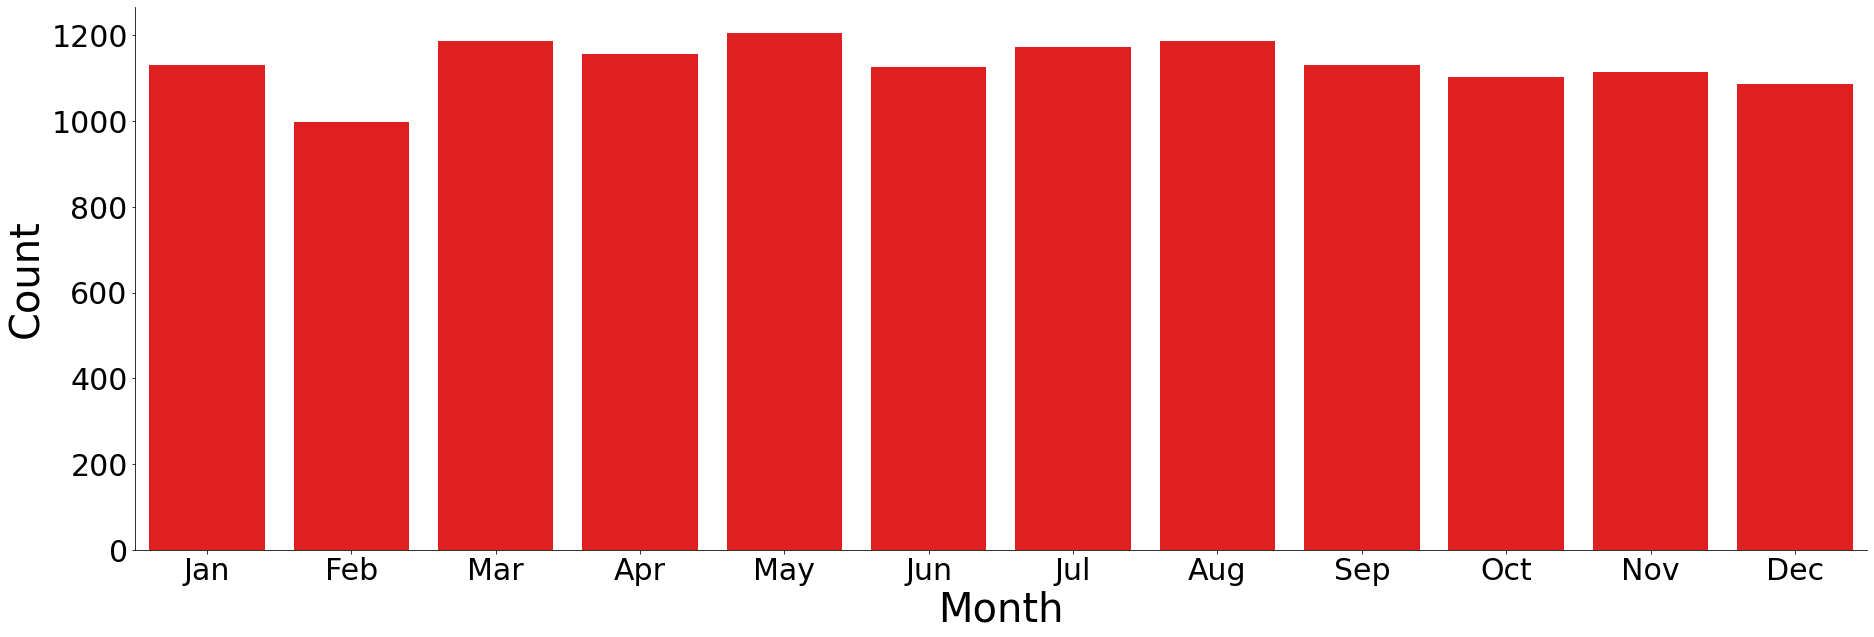

In [ ]:
# Plot of all crime per month for District C11

sns.catplot(x='MONTH',
           kind='count',
            height=8.27, 
            aspect=3,
            color='red',
           data=dist_c11)
plt.xticks(np.arange(12), Months, size=30)

# plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Month', fontsize=40)
plt.ylabel('Count', fontsize=40)

In [ ]:
# List of Serious Crimes
serious_crimes = ["Larceny", "Robbery", "Drug Violation", "Auto Theft"]

In [ ]:
# Get All Rows with Serious Crimes
nx_c11 = dist_c11[dist_c11['OFFENSE_CODE_GROUP'].isin(serious_crimes)]

In [ ]:
# Save For App
nx_c11.to_csv("serious_crimes_boston_data.csv")

In [ ]:
# Value Counts of Crime Per Month
nx_c11.groupby('MONTH')['OFFENSE_CODE_GROUP'].value_counts()

MONTH  OFFENSE_CODE_GROUP
1      Larceny                60
       Drug Violation         56
       Robbery                21
       Auto Theft             19
2      Drug Violation         83
       Larceny                42
       Auto Theft             11
       Robbery                 7
3      Drug Violation         82
       Larceny                47
       Auto Theft             21
       Robbery                12
4      Drug Violation         80
       Larceny                48
       Robbery                26
       Auto Theft             15
5      Drug Violation         74
       Larceny                67
       Auto Theft             27
       Robbery                18
6      Drug Violation        107
       Larceny                57
       Auto Theft             22
       Robbery                11
7      Drug Violation         58
       Larceny                52
       Robbery                21
       Auto Theft             15
8      Larceny                63
       Drug Viola

In [ ]:
# Convert to a DataFrame
serious_crime_per_month = pd.DataFrame(nx_c11.groupby('MONTH')['OFFENSE_CODE_GROUP'].value_counts().to_frame('counts').reset_index())

In [ ]:
serious_crime_per_month.columns

Index(['MONTH', 'OFFENSE_CODE_GROUP', 'counts'], dtype='object')

In [ ]:
serious_crime_per_month.head()

,MONTH,OFFENSE_CODE_GROUP,counts
0,1,Larceny,60
1,1,Drug Violation,56
2,1,Robbery,21
3,1,Auto Theft,19
4,2,Drug Violation,83


In [ ]:
# Find the average per month
serious_crime_per_month.groupby('MONTH')['counts'].mean()

MONTH
1     39.00
2     35.75
3     40.50
4     42.25
5     46.50
6     49.25
7     36.50
8     36.50
9     36.75
10    39.50
11    37.50
12    32.25
Name: counts, dtype: float64

In [ ]:

Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.catplot(x='MONTH',
           kind='count',
            height=8.27, 
            aspect=3,
            color='red',
           data=x_c11)
plt.xticks(np.arange(12), Months, size=30)

# plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Month', fontsize=40)
plt.ylabel('Count', fontsize=40)

In [ ]:
# Function to Get Average Serious Crime Per Month
def get_average_serious_crime(district,year=2016):
    serious_crimes = ["Larceny", "Robbery", "Drug Violation", "Auto Theft"]
    district_df = df[(df['DISTRICT'] == district) & (df['YEAR'] == year)]
    serious_crimes_df = district_df[district_df['OFFENSE_CODE_GROUP'].isin(serious_crimes)]
    total_crime_per_month = pd.DataFrame(serious_crimes_df.groupby('MONTH')['OFFENSE_CODE_GROUP'].value_counts().to_frame('counts').reset_index())
    avg_crime_per_month = total_crime_per_month.groupby('MONTH')['counts'].mean()
    return avg_crime_per_month

In [ ]:
get_average_serious_crime('D4')

MONTH
1     66.75
2     60.25
3     68.25
4     58.25
5     74.25
6     75.25
7     75.00
8     73.00
9     67.00
10    70.75
11    72.00
12    62.75
Name: counts, dtype: float64

In [ ]:
# Function to Get Average Serious Crime Per Month
def plot_average_serious_crime(district,year=2016):
    serious_crimes = ["Larceny", "Robbery", "Drug Violation", "Auto Theft"]
    district_df = df[(df['DISTRICT'] == district) & (df['YEAR'] == year)]
    serious_crimes_df = district_df[district_df['OFFENSE_CODE_GROUP'].isin(serious_crimes)]
    total_crime_per_month = pd.DataFrame(serious_crimes_df.groupby('MONTH')['OFFENSE_CODE_GROUP'].value_counts().to_frame('counts').reset_index())
    avg_crime_per_month = total_crime_per_month.groupby('MONTH')['counts'].mean()
    return avg_crime_per_month.plot(kind='bar')

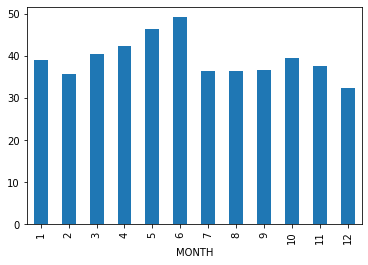

In [ ]:
plot_average_serious_crime('C11')

In [ ]:
# Function to Get Average Serious Crime Per Month
def sns_plot_average_serious_crime(district,year=2016):
    serious_crimes = ["Larceny", "Robbery", "Drug Violation", "Auto Theft"]
    district_df = df[(df['DISTRICT'] == district) & (df['YEAR'] == year)]
    serious_crimes_df = district_df[district_df['OFFENSE_CODE_GROUP'].isin(serious_crimes)]
    total_crime_per_month = pd.DataFrame(serious_crimes_df.groupby('MONTH')['OFFENSE_CODE_GROUP'].value_counts().to_frame('counts').reset_index())
    avg_crime_per_month = total_crime_per_month.groupby('MONTH')['counts'].mean().to_frame('average').reset_index()
    return sns.barplot(x='MONTH',y='average',data=avg_crime_per_month)

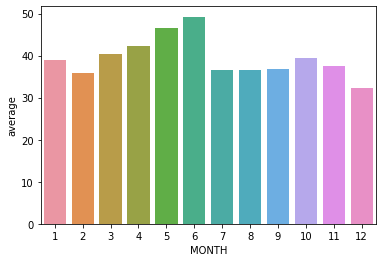

In [ ]:
sns_plot_average_serious_crime('C11')

In [ ]:
df[(df['OFFENSE_CODE_GROUP'].isin(serious_crimes)) & (df['YEAR'].isin([2016,2017]))]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,I182064766,617,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2017-10-23 13:58:00,2017,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,I182064449,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2017-03-22 09:00:00,2017,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
14227,I182055406,617,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2017-12-15 16:06:00,2017,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"
15036,I182054544,619,Larceny,LARCENY ALL OTHERS,NaN,,NaN,2017-01-01 12:00:00,2017,1,Sunday,12,Part One,MORTON,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
16568,I182052929,619,Larceny,LARCENY ALL OTHERS,A1,63,NaN,2017-08-13 21:00:00,2017,8,Sunday,21,Part One,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319024,I120470733-00,724,Auto Theft,AUTO THEFT,C6,205,NaN,2016-09-23 19:15:00,2016,9,Friday,19,Part One,A ST,42.346953,-71.051127,"(42.34695268, -71.05112684)"
319026,I120283195-00,619,Larceny,LARCENY ALL OTHERS,B2,911,NaN,2016-04-27 00:00:00,2016,4,Wednesday,0,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319031,I120201612-00,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,B2,292,NaN,2017-01-20 02:00:00,2017,1,Friday,2,Part Two,JOHN ELIOT SQ,42.330013,-71.091179,"(42.33001318, -71.09117863)"
319048,I110261417-00,619,Larceny,LARCENY OTHER $200 & OVER,B2,324,NaN,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [ ]:
serious_per_2_years = df[(df['OFFENSE_CODE_GROUP'].isin(serious_crimes)) & (df['YEAR'].isin([2016,2017]))]

In [ ]:
serious_per_2_years.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [ ]:
serious_crime_4_2_years = serious_per_2_years[['OFFENSE_CODE_GROUP','DISTRICT','YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR','Location']]

In [ ]:
# Save For App
serious_crime_4_2_years.to_csv("serious_crime_for_2016_n_2017_crime_data.csv",index=False)

In [ ]:
### Task 1: Crimes Per Hour and Location

In [ ]:
# Group By Hour
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [ ]:
df.groupby('HOUR')['Location'].value_counts()

HOUR  Location                   
0     (0.00000000, 0.00000000)       879
      (42.36183857, -71.05976489)     88
      (-1.00000000, -1.00000000)      65
      (42.30971857, -71.10429432)     49
      (42.34942864, -71.06536641)     46
                                    ... 
23    (42.39112008, -71.00229699)      1
      (42.39248647, -71.00535725)      1
      (42.39274002, -71.00479067)      1
      (42.39348242, -71.01068177)      1
      (42.39504158, -71.01017732)      1
Name: Location, Length: 125319, dtype: int64

In [ ]:
crime_per_hour = df.groupby('HOUR')['Location'].value_counts().to_frame('counts').reset_index()

In [ ]:
crime_per_hour.head()

,HOUR,Location,counts
0,0,"(0.00000000, 0.00000000)",879
1,0,"(42.36183857, -71.05976489)",88
2,0,"(-1.00000000, -1.00000000)",65
3,0,"(42.30971857, -71.10429432)",49
4,0,"(42.34942864, -71.06536641)",46


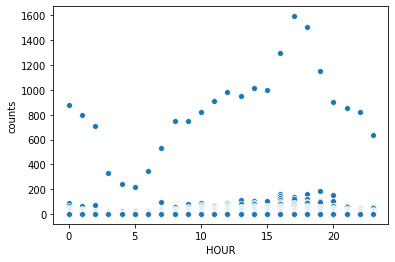

In [ ]:
sns.scatterplot(data=crime_per_hour,x='HOUR',y='counts')

In [ ]:
# Prep For Pydeck
crime_per_hour['Location'].str.replace('(','[').str.replace(')',']')

0            [0.00000000, 0.00000000]
1         [42.36183857, -71.05976489]
2          [-1.00000000, -1.00000000]
3         [42.30971857, -71.10429432]
4         [42.34942864, -71.06536641]
                     ...             
125314    [42.39112008, -71.00229699]
125315    [42.39248647, -71.00535725]
125316    [42.39274002, -71.00479067]
125317    [42.39348242, -71.01068177]
125318    [42.39504158, -71.01017732]
Name: Location, Length: 125319, dtype: object

In [ ]:
crime_per_hour['Location2'] = crime_per_hour['Location'].str.replace('(','[').str.replace(')',']')

In [ ]:
crime_per_hour.head()

,HOUR,Location,counts,Location2
0,0,"(0.00000000, 0.00000000)",879,"[0.00000000, 0.00000000]"
1,0,"(42.36183857, -71.05976489)",88,"[42.36183857, -71.05976489]"
2,0,"(-1.00000000, -1.00000000)",65,"[-1.00000000, -1.00000000]"
3,0,"(42.30971857, -71.10429432)",49,"[42.30971857, -71.10429432]"
4,0,"(42.34942864, -71.06536641)",46,"[42.34942864, -71.06536641]"


In [ ]:
# Clean and Unpack into 2 Columns
crime_per_hour['Location2'].str.split(',').str.get(0).str.replace('[','')

0          0.00000000
1         42.36183857
2         -1.00000000
3         42.30971857
4         42.34942864
             ...     
125314    42.39112008
125315    42.39248647
125316    42.39274002
125317    42.39348242
125318    42.39504158
Name: Location2, Length: 125319, dtype: object

In [ ]:
# Clean and Unpack (Long Method)
crime_per_hour['Lat'] = crime_per_hour['Location2'].str.split(',').str.get(0).str.replace('[','')
crime_per_hour['Long'] = crime_per_hour['Location2'].str.split(',').str.get(1).str.replace(']','')

In [ ]:
crime_per_hour

,HOUR,Location,counts,Location2,Lat,Long
0,0,"(0.00000000, 0.00000000)",879,"[0.00000000, 0.00000000]",0.00000000,0.00000000
1,0,"(42.36183857, -71.05976489)",88,"[42.36183857, -71.05976489]",42.36183857,-71.05976489
2,0,"(-1.00000000, -1.00000000)",65,"[-1.00000000, -1.00000000]",-1.00000000,-1.00000000
3,0,"(42.30971857, -71.10429432)",49,"[42.30971857, -71.10429432]",42.30971857,-71.10429432
4,0,"(42.34942864, -71.06536641)",46,"[42.34942864, -71.06536641]",42.34942864,-71.06536641
...,...,...,...,...,...,...
125314,23,"(42.39112008, -71.00229699)",1,"[42.39112008, -71.00229699]",42.39112008,-71.00229699
125315,23,"(42.39248647, -71.00535725)",1,"[42.39248647, -71.00535725]",42.39248647,-71.00535725
125316,23,"(42.39274002, -71.00479067)",1,"[42.39274002, -71.00479067]",42.39274002,-71.00479067
125317,23,"(42.39348242, -71.01068177)",1,"[42.39348242, -71.01068177]",42.39348242,-71.01068177


In [ ]:
crime_per_hour[['HOUR', 'Location', 'counts', 'Lat', 'Long']].to_csv('crime_per_hour_boston.csv',index=False)

In [ ]:
# Save For App
crime_per_hour.to_csv('crime_per_hour.csv',index=False)